In [1]:
import pandahouse as ph
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
#Выгрузите данные о цене, типе жилья и дате первого отзыва, начиная со 2 января 2010 года. Необходимые столбцы:

#room_type – тип сдаваемого жилья (доступные варианты: Entire home/apt, Private room, Hotel room, Shared room)
#price – цена за ночь
#first_review – дата первого отзыва (отфильтровать по правилу "строго больше 2010-01-01")
#Ограничение поставьте на 1000 строк.

In [2]:
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [5]:
q = '''
    SELECT room_type, toFloat32OrNull(replaceRegexpAll(price, '[$,]', '')) as price, first_review, 
    CASE
        WHEN price >= 0 and price <= 300 THEN '1'
        WHEN price  and avg_rub < 10 THEN 'B'
        WHEN avg_rub >= 10 and avg_rub < 20 THEN 'C'
        ELSE 'D'
    END AS cond_1
    FROM 
        ldn_listings 
    WHERE first_review > '2010-01-01'  
    LIMIT 1000
    '''
 #дата первого отзыва (отфильтровать по правилу "строго больше 2010-01-01"
    
# отправляем запрос и записываем результат в пандасовский датафрейм
first_date = ph.read_clickhouse(query=q, connection=connection_default)
first_date

,room_type,price,first_review
0,Private room,65.0,2010-08-18
1,Entire home/apt,300.0,2011-03-21
2,Entire home/apt,65.0,2016-03-05
3,Private room,29.0,2010-04-14
4,Private room,100.0,2010-10-16
...,...,...,...
995,Private room,45.0,2012-11-07
996,Private room,51.0,2013-03-18
997,Entire home/apt,79.0,2012-09-17
998,Entire home/apt,110.0,2012-09-24


In [6]:
first_date['first_review'] = pd.to_datetime(first_date['first_review'])

In [7]:
first_date['year'] = first_date['first_review'].dt.year

In [8]:
first_date

,room_type,price,first_review,year
0,Private room,65.0,2010-08-18,2010
1,Entire home/apt,300.0,2011-03-21,2011
2,Entire home/apt,65.0,2016-03-05,2016
3,Private room,29.0,2010-04-14,2010
4,Private room,100.0,2010-10-16,2010
...,...,...,...,...
995,Private room,45.0,2012-11-07,2012
996,Private room,51.0,2013-03-18,2013
997,Entire home/apt,79.0,2012-09-17,2012
998,Entire home/apt,110.0,2012-09-24,2012


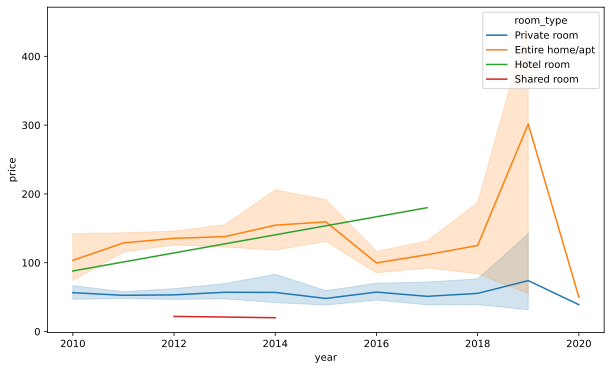

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year',y='price',hue='room_type',data=first_date)